#### contents

* [import_required_libraries](#import-required-libraries)

* [processing_data](#processing-data)

* [build_model](#build-model)

* [export_for_metadata_and_vectors](#export-for-metadata-and-vectors)

* [make_a_WordCloud](#make-a-WordCloud)

#### import required libraries

In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

#### processing data

In [231]:
df = pd.read_csv('imdb.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [100]:
df = df.replace({'sentiment':{'positive':1,'negative':0}})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


We separate train =  80% and test = 20%

In [101]:
q = int(len(df)*0.8)
print(f'q: {q}')

q: 40000


In [102]:
train = df[:q]
train

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
39995,This was a marvelously funny comedy with a gre...,1
39996,There is no plot. There are no central charact...,1
39997,This show is awesome! I love all the actors! I...,1
39998,The fact that this movie has been entitled to ...,0


In [103]:
test = df[q:]
test

,review,sentiment
40000,First off I want to say that I lean liberal on...,0
40001,I was excited to see a sitcom that would hopef...,0
40002,When you look at the cover and read stuff abou...,0
40003,"Like many others, I counted on the appearance ...",0
40004,"This movie was on t.v the other day, and I did...",0
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [105]:
train_sentences = list(train['review'])
train_labels = list(train['sentiment'])
test_sentences = list(test['review'])
test_labels = list(test['sentiment'])

print(f'train_sentences: {len(train_sentences)}')
print(f'test_sentences: {len(test_sentences)}')
print(f'train_labels: {len(train_labels)}')
print(f'test_labels: {len(test_labels)}')

train_sentences: 40000
test_sentences: 10000
train_labels: 40000
test_labels: 10000


In [107]:
index = random.randrange(0,len(train_sentences))
sentence = train_sentences[index]
label = train_labels[index]
print(f'index: {index}')
print(f'sentence: {sentence}')
print(f'label: {label}')

index: 12139
sentence: First of all I have to say that I'm a huge Lucio Fulci and Dario Argento fan. Although I have not seen absolutely all of their movies, I really enjoyed almost every one I did see. I really like giallos and I thought Argento was the master of this genre, after seeing films like "Tenebre" and "Phenomena". But after I saw "New York Ripper" by Fulci, I found out that he could do pretty good giallos besides his graphic zombie movies and even outdo Argento, on a certain level.<br /><br />I love Fulci's style, and yes I love gore, but this film I think, although it has a more developed plot and characters than his other films, is not his best one. What I don't like is that it can be confusing at times, especially at the end. And the fact that we go from one suspect, to another, and then another until we even suspect the retarded little girl for a moment, I think it goes too far. I know giallos are supposed to keep you guessing until the end, and the killer should be ver

In [109]:
# convert to numpy array
train_labels = np.array(train_labels)
print(f'train_label {train_labels.shape} {train_labels[:10]}')
test_labels = np.array(test_labels)
print(f'test_label {test_labels.shape} {test_labels[:10]}')

train_label (40000,) [1 1 1 0 1 1 1 0 0 1]
test_label (10000,) [0 0 0 0 0 1 1 0 0 0]


In [110]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [111]:
vocab_size = 10000
embedding_dim = 64 # 32,64 convert the text vector n-dimensions
max_length = 140 # the maximum length of sentence # for padding

In [112]:
tokenizer = Tokenizer(num_words = vocab_size,
                      oov_token= '<OOV>',
                      lower = True,
                      split = ' ',
                      filters = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

In [113]:
tokenizer.fit_on_texts(train_sentences)

In [114]:
word_index = tokenizer.word_index
print(len(word_index))
word_index

112174


{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'not': 22,
 'you': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'so': 35,
 'who': 36,
 'from': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'out': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'some': 47,
 'there': 48,
 'what': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'my': 57,
 'even': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'can': 67,
 'had': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'than': 72,
 'much': 73,
 'we': 74,
 'bad': 75,
 'get': 76,
 'been': 77,
 'great': 78,
 'do': 79,
 'will': 80,
 'other': 81,
 'also': 82,
 '

In [120]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_sequences[0]

[28,
 5,
 2,
 81,
 2103,
 46,
 1074,
 13,
 101,
 148,
 40,
 317,
 2969,
 410,
 460,
 27,
 3174,
 34,
 24,
 201,
 15,
 12,
 7,
 615,
 49,
 607,
 17,
 69,
 8,
 8,
 2,
 88,
 149,
 13,
 3257,
 69,
 42,
 2969,
 14,
 93,
 5627,
 3,
 1,
 135,
 5,
 570,
 61,
 272,
 9,
 201,
 37,
 2,
 674,
 140,
 1713,
 69,
 12,
 7,
 22,
 4,
 119,
 16,
 2,
 7871,
 2258,
 39,
 1,
 12,
 119,
 2496,
 55,
 5663,
 17,
 5183,
 6,
 1439,
 378,
 39,
 570,
 93,
 7,
 3731,
 9,
 2,
 361,
 354,
 5,
 2,
 674,
 8,
 8,
 10,
 7,
 432,
 2969,
 15,
 13,
 7,
 2,
 1,
 357,
 6,
 2,
 1,
 6527,
 2595,
 1088,
 1,
 10,
 2662,
 1433,
 21,
 1,
 535,
 33,
 4796,
 2452,
 5,
 2,
 1194,
 118,
 30,
 2,
 6894,
 26,
 2875,
 1,
 3,
 393,
 1,
 35,
 1,
 7,
 22,
 305,
 21,
 2,
 4797,
 7406,
 535,
 7,
 347,
 6,
 107,
 1,
 7466,
 1,
 1,
 4722,
 8341,
 2307,
 3,
 51,
 35,
 1,
 327,
 9001,
 6814,
 1,
 3,
 8699,
 1,
 24,
 112,
 227,
 242,
 8,
 8,
 11,
 59,
 133,
 2,
 283,
 1319,
 5,
 2,
 119,
 7,
 688,
 6,
 2,
 193,
 13,
 10,
 273,
 118,
 81,
 277,
 598

In [124]:
# convert the sequences
padded_train_sequences = pad_sequences(train_sequences,maxlen = max_length,truncating = 'post',padding = "post") # post mean add padding from behind, from pre mean add padding from ahead
print(f'padded_train_sequences: {padded_train_sequences.shape}')
padded_train_sequences

padded_train_sequences: (40000, 140)


array([[  28,    5,    2, ..., 4797, 7406,  535],
       [   4,  395,  121, ...,  258, 4477,  580],
       [  11,  191,   12, ...,    8,   12,  205],
       ...,
       [  12,  119,    7, ...,    0,    0,    0],
       [   2,  193,   13, ...,    7,   97, 4414],
       [  11,   26,    6, ...,   12,   14,    2]])

In [142]:
# do the same with test dataset
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = pad_sequences(test_sequences,maxlen = max_length,truncating = 'post',padding = "post") # post mean add padding from behind, from pre mean add padding from ahead
print(f'padded_test_sequences: {padded_test_sequences.shape}')
padded_test_sequences

padded_test_sequences: (10000, 140)


array([[  88,  123,   11, ...,   11,  214,  651],
       [  11,   14, 2269, ...,    7,   53, 2069],
       [  52,   23,  162, ...,  110,  599,  242],
       ...,
       [  11,  232,    4, ...,    3,    2,   88],
       [ 144,  167,    6, ..., 3787,  425,  116],
       [  55,   28, 6068, ...,    0,    0,    0]])

#### build model

![model_architeture](./imgs/model.png)

In [236]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense,Dropout

In [221]:
# check embedded output
embedding_layer = Embedding(vocab_size, embedding_dim, input_length = max_length)
embedded_output = embedding_layer(padded_train_sequences[0])
print(embedded_output.shape)

(140, 64)


In [247]:
model = Sequential()

In [248]:
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length)) #(number_samples,input_lenght,embedding_dim)
model.add(Flatten()) # (number_samples x input_lenght x embedding_dim)
model.add(Dense(5,activation = 'relu')) # (number_samples,10)
model.add(Dropout(0.3)) # avoid overfiting
model.add(Dense(1,activation = 'sigmoid')) # (number_samples,1)

In [249]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 140, 64)           640000    
_________________________________________________________________
flatten_10 (Flatten)         (None, 8960)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 44805     
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 684,811
Trainable params: 684,811
Non-trainable params: 0
_________________________________________________________________


In [250]:
# compile your model
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['acc'])

In [251]:
# train your model
history = model.fit(padded_train_sequences,
                    train_labels,
                    epochs = 5,
                    verbose = True,
                    validation_data =(padded_test_sequences,test_labels)
                   )

Epoch 1/5
1250/1250 [==============================] - 32s 26ms/step - loss: 0.4716 - acc: 0.7772 - val_loss: 0.3479 - val_acc: 0.8498
Epoch 2/5
1250/1250 [==============================] - 35s 28ms/step - loss: 0.2549 - acc: 0.9150 - val_loss: 0.3671 - val_acc: 0.8514: 0s - loss: 0.2554 - ac
Epoch 3/5
1250/1250 [==============================] - 33s 27ms/step - loss: 0.1174 - acc: 0.9707 - val_loss: 0.5030 - val_acc: 0.8393
Epoch 4/5
1250/1250 [==============================] - 36s 29ms/step - loss: 0.0589 - acc: 0.9882 - val_loss: 0.5938 - val_acc: 0.8467
Epoch 5/5
1250/1250 [==============================] - 34s 27ms/step - loss: 0.0398 - acc: 0.9918 - val_loss: 0.7649 - val_acc: 0.8430


<AxesSubplot:>

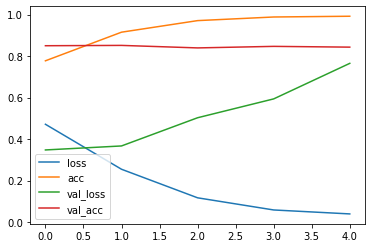

In [252]:
# display loss curve
pd.DataFrame(history.history).plot()

In [155]:
# evaluate model
model.evaluate(padded_test_sequences,test_labels,verbose = True)

313/313 [==============================] - 1s 3ms/step - loss: 0.8976 - acc: 0.8517


[0.8976483345031738, 0.8517000079154968]

In [173]:
# predict model
sentence = ["This movie may have a good side"]
print(f'sentence: {len(sentence)} \n')
sequence = tokenizer.texts_to_sequences(sentence)
print(f'sequence: {sequence} \n')
padded_sequence = pad_sequences(sequence,maxlen = max_length,truncating = 'post',padding = 'post')
# padded_sequence = np.expand_dims(padded_sequence,0)
print(f'padded_sequence: {padded_sequence.shape} \n')
yhat = model.predict(padded_sequence)
print(yhat)

sentence: 1 

sequence: [[12, 18, 205, 26, 4, 50, 489]] 

padded_sequence: (1, 140) 

[[0.58185613]]


In [175]:
# get weights
weights = model.get_weights()[0] # layer embedding
print(weights.shape)
weights

(10000, 64)


array([[-3.9871644e-02,  2.7757809e-03, -1.0257458e-02, ...,
         2.2110231e-02, -3.2840803e-02,  1.1028100e-02],
       [-2.3823133e-02,  2.5876125e-02,  1.2094797e-02, ...,
         2.4662782e-02, -5.9442274e-02, -2.8430466e-02],
       [-4.5963902e-02, -2.4211943e-02, -4.7288224e-02, ...,
        -5.7232455e-07, -1.4711906e-02,  5.4173134e-02],
       ...,
       [ 1.0487891e-02, -4.3552823e-02,  5.2173238e-02, ...,
         1.2773456e-02,  1.4837286e-02, -1.0471724e-03],
       [-4.8621465e-03, -5.9718877e-02, -3.7774069e-03, ...,
         8.1445366e-02,  6.3011445e-02,  8.7521113e-02],
       [ 4.5471005e-02,  1.0665082e-01,  9.9090710e-02, ...,
         9.0243481e-02, -3.9514046e-02,  8.2248244e-03]], dtype=float32)

#### export for metadata and vectors

In [176]:
import io

In [187]:
#print(word_index)
print(vocab_size)
print(weights.shape)

10000
(10000, 64)


In [190]:
out_v = io.open('vecs.tsv','w',encoding = 'utf-8')
out_m = io.open('meta.tsv','w',encoding = 'utf-8')

# the tokenizer have index start with 1
for i in range(1,vocab_size): 
    word = tokenizer.index_word[i]
    vector = weights[i]
    out_m.write(word + '\n')
    out_v.write('\t'.join(str(x) for x in vector) + '\n')

# close file
out_m.close()
out_v.close()

#### make a WordCloud

In [192]:
from wordcloud import WordCloud, STOPWORDS

In [208]:
print(f'we have {len(STOPWORDS)} stopword')
STOPWORDS

we have 192 stopword


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [209]:
wordcloud = WordCloud(width = 1200,
                      height = 800,
                      background_color = 'black',
                      stopwords = STOPWORDS,
                      min_font_size = 10
                     )

In [210]:
import matplotlib.pyplot as plt

In [216]:
words = list(word_index.keys())

t = ""

for word in words:
    t += word + " "

In [217]:
t

"<OOV> the and a of to is br in it i this that was as for with movie but film on not you are his have be one he all at by an they so who from like or just her about out if it's has some there what good more when very up no time my even would she which only really see story their can had me well were than much we bad get been great do will other also people into because how him first most don't made then its make them way too movies could any after think characters watch films two many seen character being plot never love acting life did best where show know little over off ever does better your man end still scene these say here scenes while why something such go back through should i'm now those real watching thing actors funny though doesn't 10 years didn't old another before work actually look nothing director makes find going new same lot every few part again us down cast quite things pretty want world horror around seems take can't young however big thought got fact both long that

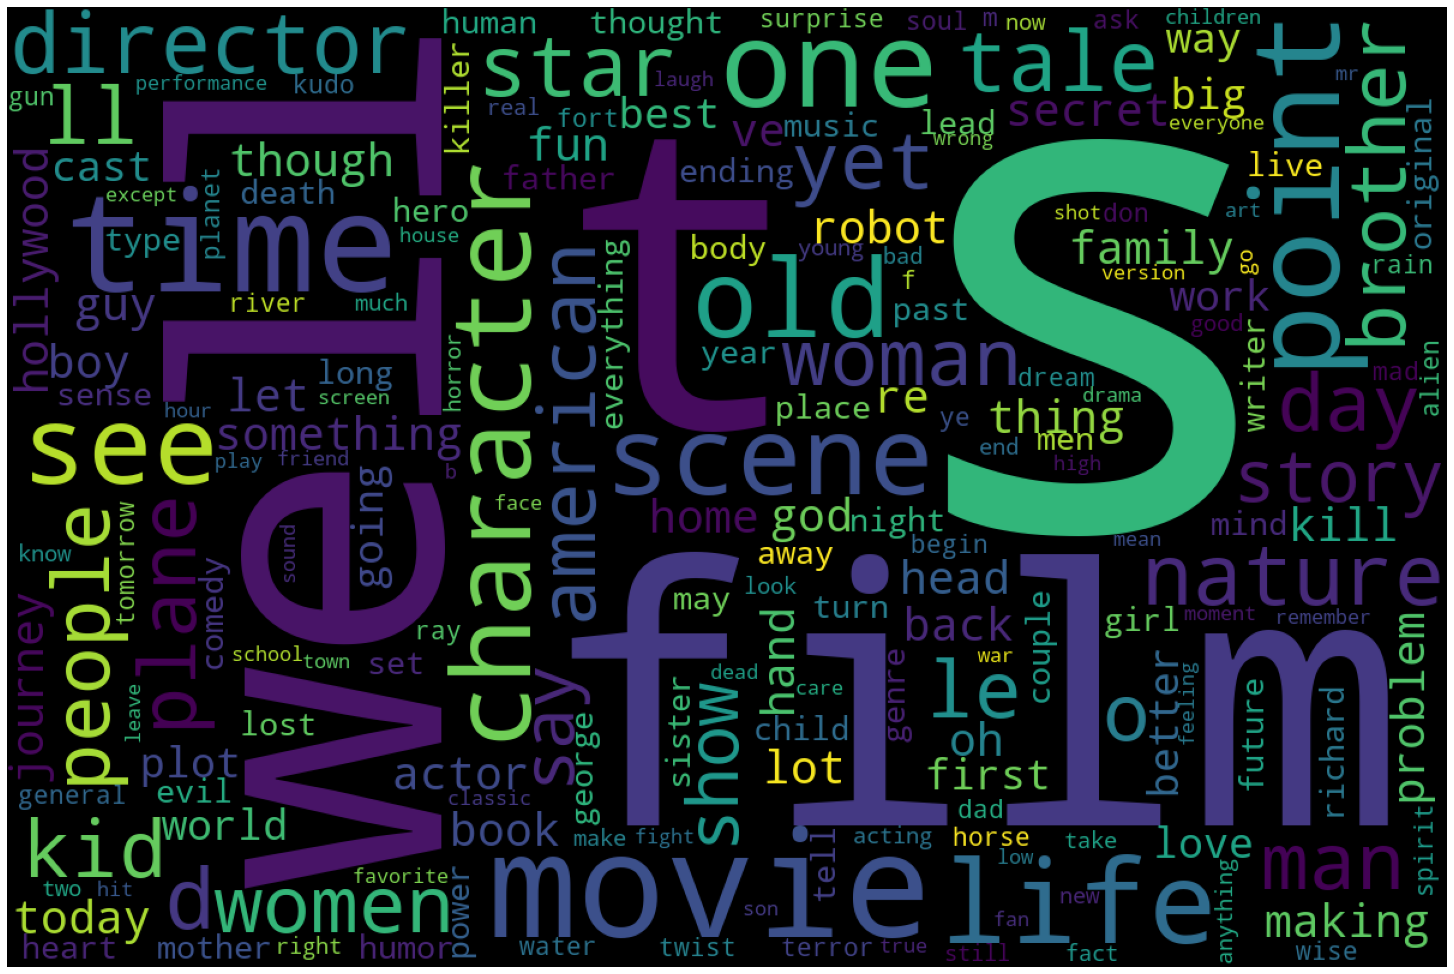

In [254]:
wordcloud.generate(t)
plt.figure(figsize = (20,16),facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.savefig('wordcould.png')
plt.show()